# Test $\chi^2$ para histogramas

In [1]:
%matplotlib notebook

In [2]:
pip install boost-histogram

You should consider upgrading via the '/home/dravignani/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
import boost_histogram as bh

Parámetros de la distribución según la hipótesis nula $H_0$

In [4]:
mu = 0
sigma = 1

Muestra de 1000 datos

In [5]:
datos = np.loadtxt('test_chi2_1k.txt')

Muestra de 10000 datos

In [6]:
# datos = np.loadtxt('test_chi2_10k.txt')

Histograma

In [7]:
xlim = 3
nbines = 20
histo = bh.Histogram(bh.axis.Regular(bins=nbines, start=-xlim, stop=xlim))
histo.fill(datos)

Histogram(Regular(20, -3, 3), storage=Double()) # Sum: 998.0 (1000.0 with flow)

## Gráfico

<IPython.core.display.Javascript object>


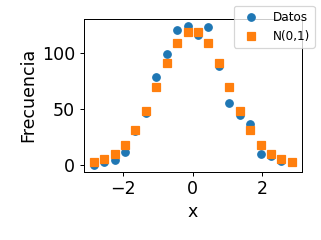

Text(0, 0.5, 'Frecuencia')

In [8]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('x')
ax1.set_ylabel('Frecuencia')


Graficar datos

In [9]:
x = histo.axes.centers[0]
y = histo.values()
ax1.plot(x, y, 'o', label='Datos')

Graficar PDF N(0,1)

In [10]:
ndatos = len(datos)
ancho_bin = histo.axes.widths[0][0]
mu = norm.pdf(x, loc=mu, scale=sigma)  * ndatos * ancho_bin
ax1.plot(x, mu, 's', label='N(0,1)')

In [11]:
fig1.legend()
fig1.savefig('test_chi2.svg')

## Test $\chi^2$

Selecciono solo los bines con más entradas

In [12]:
mu_min = 50

In [13]:
mu_sel = mu[mu>mu_min]
mu_sel

array([ 68.96464221,  90.34122965, 108.15808874, 118.34379927,
       118.34379927, 108.15808874,  90.34122965,  68.96464221])

In [14]:
sigma_sel = np.sqrt(mu_sel)
sigma_sel

array([ 8.3044953 ,  9.50480035, 10.39990811, 10.87859363, 10.87859363,
       10.39990811,  9.50480035,  8.3044953 ])

In [15]:
y_sel = y[mu>mu_min]
y_sel

array([ 78.,  99., 120., 124., 116., 123.,  88.,  55.])

In [16]:
z = (y_sel-mu_sel) / sigma_sel
z

array([ 1.08800806,  0.91098919,  1.13865537,  0.5199386 , -0.21545058,
        1.42711946, -0.24632076, -1.68157627])

In [17]:
t_obs = np.sum(z*z)
print("Estadística del test = ", t_obs)

Estadística del test =  8.55199660552633


Pvalor

In [18]:
grados_libertad = len(y_sel)
grados_libertad

8

In [19]:
p_valor = chi2.sf(t_obs, df=grados_libertad)
p_valor

0.3814850420265527

<IPython.core.display.Javascript object>


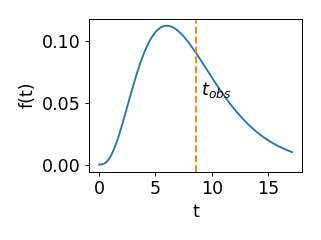

Text(0, 0.5, 'f(t)')

In [20]:
fig2, ax2 = plt.subplots()
ax2.set_xlabel('t')
ax2.set_ylabel('f(t)')

In [21]:
t = np.linspace(0, 2*t_obs, 256)
pdf_chi2 = chi2.pdf(t, df=grados_libertad)
ax2.plot(t, pdf_chi2)

In [22]:
ax2.axvline(t_obs, ls='--', color='tab:orange')
ax2.text(t_obs, 0.5, ' $t_{obs}$', transform=ax2.get_xaxis_text1_transform(0)[0])

Text(8.55199660552633, 0.5, ' $t_{obs}$')

In [23]:
sigmas = norm.isf(p_valor)
print(f'Rechazamos que los datos siguen una distribución estándar normal con un nivel de confianza de {sigmas:.1f} σ')

Rechazamos que los datos siguen una distribución estándar normal con un nivel de confianza de 0.3 σ
